<a href="https://colab.research.google.com/github/mutaician/A-learning-notebooks/blob/main/Introduction_to_Deep_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Deep Learning**

<img src="https://incubator.ucf.edu/wp-content/uploads/2023/07/artificial-intelligence-new-technology-science-futuristic-abstract-human-brain-ai-technology-cpu-central-processor-unit-chipset-big-data-machine-learning-cyber-mind-domination-generative-ai-scaled-1-1500x1000.jpg" width="600"/>


© Deep Learning Indaba 2025. Apache License 2.0.

**Authors:** Amel Sellami, Ulrich A. Mbou Sob, Tinuade Adeleke, Geraud Nangue Tasse, Kale-ab Tessera, Ismaïla Seck

**Reviewers:** Rym Oualha

**Introduction:**

In this tutorial, we will explore the fundamental concepts that underpin deep learning. You will learn how to build and train deep learning (DL) models from scratch using numpy. We will then conclude by demonstrating how to train larger models efficiently using specialized DL frameworks such as JAX.

**Topics:**

Content: <font color='green'>`Numerical Computing`</font> , <font color='orange'>`Supervised Learning`</font>  
Level: <font color='grey'>`Beginner`</font>


**Aims/Learning Objectives:**

- Understand high-level concepts in machine learning, including data, models, and learning.
- Get an overview of key terminology in modern machine learning.
- Learn how to implement and train deep learning models using NumPy.
- Learn how to scale and train larger models using JAX.

**Prerequisites:**

- Basic knowledge of [NumPy](https://github.com/numpy/numpy).
- Basic knowledge of [functional programming](https://en.wikipedia.org/wiki/Functional_programming).

**Outline:**
>[Introduction to Deep Learning](#scrollTo=7ub_WZ6A88_e)

>>[Installation and Imports](#scrollTo=6EqhIg1odqg0)

>[Part 1 - What is Machine Learning - 25 minutes ⏰](#scrollTo=cMhBHaeYEn9t)

>>[💻Introduction and Motivation](#scrollTo=OueV4gWwEn9u)

>>>[Is it a 1 or a 7?](#scrollTo=OueV4gWwEn9u)

>>>[What is Machine Learning?](#scrollTo=DIe8aXmGrWEL)

>>[1.1 Data](#scrollTo=YcXv8nydNjwL)

>>[1.2 Models](#scrollTo=S586n3hEEn9z)

>>[1.3 Learning](#scrollTo=W0hbEofBQOn8)

>>>[Loss Function](#scrollTo=W0hbEofBQOn8)

>>>[Learning Algorithm](#scrollTo=W0hbEofBQOn8)

>>>[Generalization](#scrollTo=W0hbEofBQOn8)

>>[1.4 Types of machine learning problems](#scrollTo=Y71M5dCdEn9z)

>>[1.5 Modern Terminology](#scrollTo=_ssdwdCLEn9z)

>[Part 2 - Building a Deep Learning Model from scratch - 50 minutes ⏰](#scrollTo=Enx0WUr8tIPf)

>>[2.1 What is a Neural Network?](#scrollTo=B_ZUCGGbpkwV)

>>[2.2 Forward Propagation](#scrollTo=UvjplT3PqssE)

>>[2.3 Loss functions](#scrollTo=RZcW6glVq-QM)

>>[2.4 Optimization](#scrollTo=pCTVMR4tvIvS)

>>[2.7 Putting it all together](#scrollTo=Si86A1wbv6dg)

>[Part 3 - Building bigger models using specialied DL framworks - 30 minutes ⏰](#scrollTo=aB0503xgmSFh)

>>[3.1 Brief Introduction to JAX](#scrollTo=DG5ZkS3C4auq)

>>>[Similarities ✅](#scrollTo=YXtr8f36j0BG)

>>>[Differences ❌](#scrollTo=gtmbf7rkloCm)

>>[3.2 Core Jax Primitives - jit and grad](#scrollTo=3u68NGbcmmS4)

>>>[jit - Just-In-Time Compilation](#scrollTo=-yJJDhOcm1wx)

>>>[grad - Automatic Differentiation](#scrollTo=IG-2fL1gnH-3)

>>[3.2 Implemeting our Neural Network in JAX using Flax](#scrollTo=_pANISs05iHL)

>>[3.4 Training and Evaluation](#scrollTo=gq_ZRdUa6otr)

>[Conclusion](#scrollTo=fV3YG7QOZD-B)

>[Feedback](#scrollTo=o1ndpYE50BpG)

**Before you start:**

Run the "Installation and Imports" cell.


## Installation and Imports

In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

!pip install pandas jax matplotlib tensorflow scikit-learn ipywidgets flax clu --quiet

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap, pmap
from typing import NamedTuple, Any, Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

np.random.seed(42)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00


# **Part 1 - What is Machine Learning** - 25 minutes ⏰


## 💻**Introduction and Motivation**

### Is it a 1 or a 7?
Imagine you had to design a system that detects text from people's handwriting. Could you code this up from first principles? This problem is really challenging! Even identifying just numbers is tough since each digit can be written in countless ways.

If you are stuck, do not worry, this is a challenging problem to solve. The key insight is that, while defining rules to recognize handwritten digits is difficult, you already have the ability to do this. You can look at a handwritten number and tell what number it is. With this ability, you can collect a large dataset of handwritten digits and label this dataset with the correct numbers. Using this dataset, you can train a machine learning model to do the task -- the same task that would be really challenging to do using rules.  



**Exercise 1.1** Let's play a digit guessing game to simulate what we discussed above! Can you identify these digits? Do you think this is hard for a computer to do?

In [ ]:
## Hide code.
# @title Helper functions. (Run Cell)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from ipywidgets import widgets, HBox, VBox
from IPython.display import display, HTML
import io

# Function to display an image and get user input
def display_and_guess(x_train, y_train, question, options, interactive=True):
    idx = np.random.randint(0, len(x_train))
    image = x_train[idx]
    label = y_train[idx]

    # Create the image
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(question, fontsize=12)

    if interactive:
        # Convert plot to image
        buf = io.BytesIO()
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = widgets.Image(value=buf.getvalue(), format='png')
        plt.close(fig)

        output = widgets.Output()

        def on_button_click(b):
            with output:
                output.clear_output()
                if b.description == str(label):
                    display(HTML(f'<p style="color:green; font-size:12px;"><b>Correct! 🎉</b></p>'))
                else:
                    display(HTML(f'<p style="color:red; font-size:12px;"><b>Incorrect. It was a \'{label}\'. 😔</b></p>'))

        # Create buttons dynamically based on the provided options
        buttons = [widgets.Button(description=str(option), button_style='info', layout=widgets.Layout(width='40px')) for option in options]
        for button in buttons:
            button.on_click(on_button_click)

        return VBox([img, HBox(buttons), output])

    else:
        plt.show()
        # Non-interactive fallback for VSCode notebooks or other environments
        user_input = input(f"{question} Enter your guess {options}: ")
        if user_input == str(label):
            print("Correct! 🎉")
        else:
            print(f"Incorrect. It was a '{label}'. 😔")

def numbers_recognition_game(rounds=2, interactive=True):

    # Play the game for a few rounds
    display(HTML('<h1 style="text-align:center;">Let\'s play a digit guessing game!</h1>'))

    # Load the MNIST dataset
    print("Loading MNIST dataset...")
    # mnist = fetch_openml('mnist_784', version=1, data_home="~/scikit_learn_data")
    # X = mnist['data'].values.reshape(-1, 28, 28)
    # y = mnist['target'].astype(int)

    # X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
    (X, y), (_, _) = mnist.load_data()

    # Prepare datasets for '1' vs '7' and '0' vs '6'
    datasets = {
        "1 vs 7": (X[np.where((y == 1) | (y == 7))[0]], y[np.where((y == 1) | (y == 7))[0]]),
        "0 vs 6": (X[np.where((y == 0) | (y == 6))[0]], y[np.where((y == 0) | (y == 6))[0]])
    }

    for _ in range(rounds):
        row = []
        for question, (x_train, y_train) in datasets.items():
            options = [int(digit) for digit in question.split(" vs ")]
            row.append(display_and_guess(x_train, y_train, f"Is this a {question}?", options, interactive))

        # Add a third column with a random question
        random_question = np.random.choice(list(datasets.keys()))
        x_train, y_train = datasets[random_question]
        options = [int(digit) for digit in random_question.split(" vs ")]
        row.append(display_and_guess(x_train, y_train, f"Is this a {random_question}?", options, interactive))

        if interactive:
            display(HBox(row))

    display(HTML('<h2 style="text-align:center;">Thanks for playing!</h2>'))

In [ ]:
numbers_recognition_game(rounds=2, interactive=True)

How did you do? You might have gotten easy or hard numbers to distinguish, but think about all the possible handwriting styles out there.

In the next section, we will discuss Machine learning (ML), a technique which you could use to teach a computer how to play this game.

If no images were displayed, make sure you have `ipywidgets` installed, or run `numbers_recognition_game(rounds=2, interactive=False)`.

### **What is Machine Learning?**

Machine learning (ML) is about designing algorithms that automatically extract useful information from data ([mathematics for machine learning](https://mml-book.github.io/)). Instead of explicitly programming every rule, ML allows the computer to learn from data and make predictions or decisions based on what it has learned.

In ML, there are three main components: data, models, and learning.

🔑 **Key Components**

- **Data**: These are generally a collection of examples that we want to learn from.
- **Models**: Functions that take data as input and produce predictions or decisions as output. These models are controlled by parameters, which are like adjustable knobs that determine how the model behaves.
- **Learning**: The process of adjusting the model's parameters to improve its performance on a specific task.

## 1.1 **Data**

ML is about finding patterns in data, which can take various forms such as images, text, audio, and more. For computers to process and analyze this data, it must be represented numerically, often as vectors (which are like lists of numbers) or matrices (which are like grids of numbers). For example, an image can be represented as a grid where each cell contains a pixel value, reflecting the brightness or colour at that point, the number 0 can be used for black and 255 for white, and the numbers in between can represent varying brightness from black to white.

**Understanding Inputs and Labels:**

In a machine learning task, our data typically consists of two main components: inputs (also called features) and labels. The input is the information we have and use to make predictions. The label is the outcome we want to predict.

For example, in a digit recognition task:

- The **input** would be an image of a handwritten digit.
- The **label** would be the actual digit that the image represents (e.g., 0, 1, 2, ..., 9).

**Supervised Learning and Datasets:**

In supervised learning, the most common type of machine learning, we work with input-output pairs. Each pair consists of an input and its corresponding label, and each pair is referred to as a sample. Collectively, these samples form a dataset.

We use this dataset to train an ML model. The model learns from the patterns in the input-output pairs and uses this knowledge to make predictions on new, unseen inputs. The goal is to create a model that can accurately predict the output (label) when given a new input, even if it hasn't seen that specific example before.

🎯 **Task: Predicting energy efficiency for different building types**

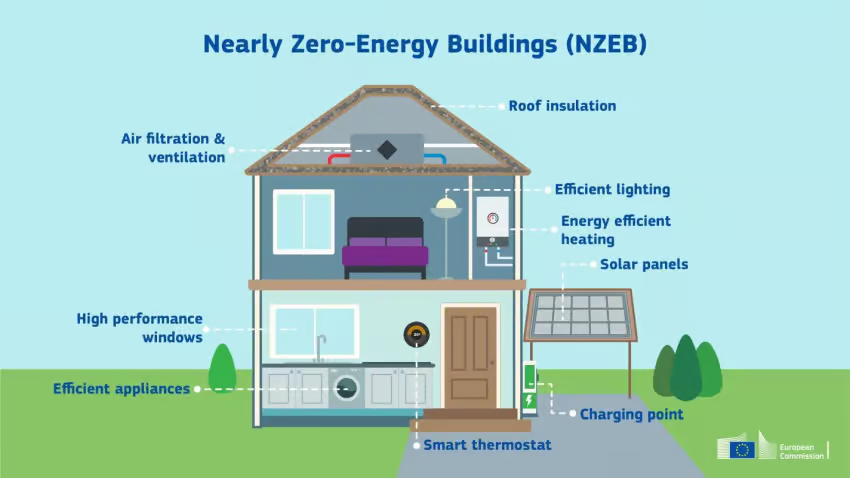

Credit: [European Commision](http://cosmosmagazine.com/science/home-construction-energy-efficient/)
  
We currently live in an era where almost everything is recorded — an age often referred to as the Big Data Era. As a result, machine learning models are being applied across countless fields to make the most of this data and optimize systems wherever possible.

Africa is a continent under rapid development, with new buildings rising every day. But have we ever stopped to ask: Are these buildings designed to optimize energy efficiency?

That’s the challenge we’ll explore today. Using a well-curated dataset of buildings with different architectural features and shapes, we will build a machine learning model to predict the energy efficiency of a building — specifically, how much energy is required to heat or cool it.

We will visualize the data with a correlation matrix -- a table that shows how related different variables are (using correlation coefficients between pairs of variables).

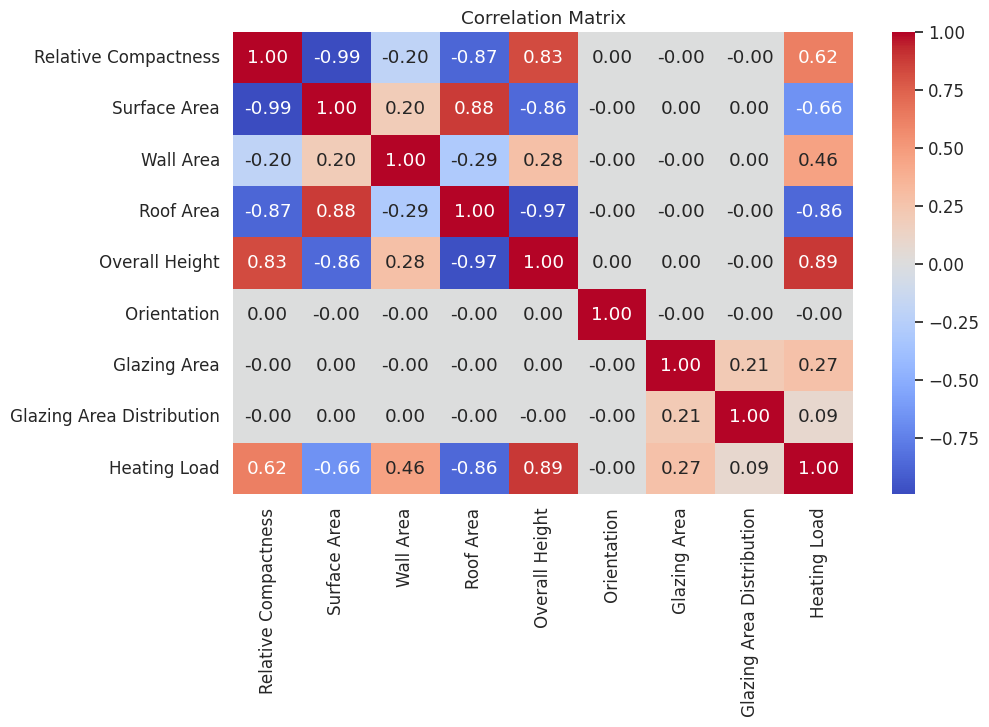

In [ ]:
## Hide code.
# @title Let's visualise the data. (Run Cell)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)

X = df.iloc[:, :-2]  # features
y = df["Y1"]         # heating load target

original_columns = [
    "Relative Compactness",
    "Surface Area",
    "Wall Area",
    "Roof Area",
    "Overall Height",
    "Orientation",
    "Glazing Area",
    "Glazing Area Distribution",
    "Heating Load",
    "Cooling Load"
]

# Replace the column names
df.columns = original_columns
# Drop Cooling Load
df = df.drop(columns=["Cooling Load"])

# Set up seaborn theme
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 2. Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


This dataset consists of 8 building features and 1 target variable — the heating load, which measures the energy required to heat the building. As shown in the plots, some features are highly correlated with each other, while others show little to no correlation.

With traditional machine learning algorithms, we would typically spend a significant amount of time exploring and engineering features before training a model. However, deep learning models have the ability to automatically learn and prioritize the most relevant features for the task, reducing the need for extensive manual feature selection.

## 1.2 **Models**

Models transform data in useful ways. They take input data and produce the desired output. Formally, a model is a function $f(x)$ that maps input data $x$ (a sample from our dataset) to output data $y$ (the label). For example, in our energy prediction dataset, the input is a vector of different measurements from the building such as surface area, compactness, orientation, height, etc., and the output is the predicted heating load.

The model's behaviour is controlled by parameters, which are adjustable values updated during the learning process.

## 1.3 **Learning**

**Learning** is the process of improving a model's performance by updating its parameters. This improvement is guided by an **objective function**, often called the **loss function**, which measures how well the model is performing.

### Loss Function

The **loss function**, denoted as $ L $, quantifies the difference between the model's prediction $ f(x) $ and the actual outcome $ y $. It outputs a number that represents how close the prediction is to the actual outcome.

- **Prediction**: $ f(x) $
- **Actual Outcome**: $ y $
- **Loss Function**: $ L(f(x), y) $

The goal of learning is to **minimize** this loss function. Although we could also maximize the loss function in theory, minimizing it is the conventional approach.

### Learning Algorithm

The **learning algorithm** is responsible for adjusting the model's parameters to minimize the loss function. Intuitively, you can think of learning as **tuning** the model's knobs (parameters) to get the desired behaviour. The learning algorithm does the tuning, while the loss function tells us *how well the tuning is working*.

Formally, learning involves finding the parameters $\theta$ of our model $f$ that minimize the loss function $L$ over the dataset $X$:

Minimize $L(f(x; \theta), y)$ over  $X$.

### Generalization

Our goal is not only to perform well on the training data but also to ensure that the model generalizes well to new, unseen data. This aspect will be discussed in more detail in Part 3.

Learning can occur in various settings. We will explore the main types of learning in the next section.

**Exercise 1.2**: Which of the following best describes the core principle of machine learning?

(*Discuss with your neighbours*).

**a**) Writing complex algorithms to solve specific problems.

**b**) Manually programming rules for every possible scenario.

**c**) Allowing computers to learn from data without being explicitly programmed.

**d**) Developing AI that can mimic human thought processes.

In [ ]:
selection = "c"  # @param ["a", "b", "c", "d"]
print(f"You selected: {selection}")

correct_answer = "c"
if selection != correct_answer:
  print("Incorrect answer, the correct answer is C. ML brings a paradigm shift in how we approach problem-solving with computers. Instead of manually programming every rule, machine learning allows computers to learn patterns and make decisions based on data.")
else:
  print("Nice, you got the correct answer!")

You selected: c
Nice, you got the correct answer!


## **1.4 Types of machine learning problems**

Broadly speaking, machine learning tasks can be classified into three categories.

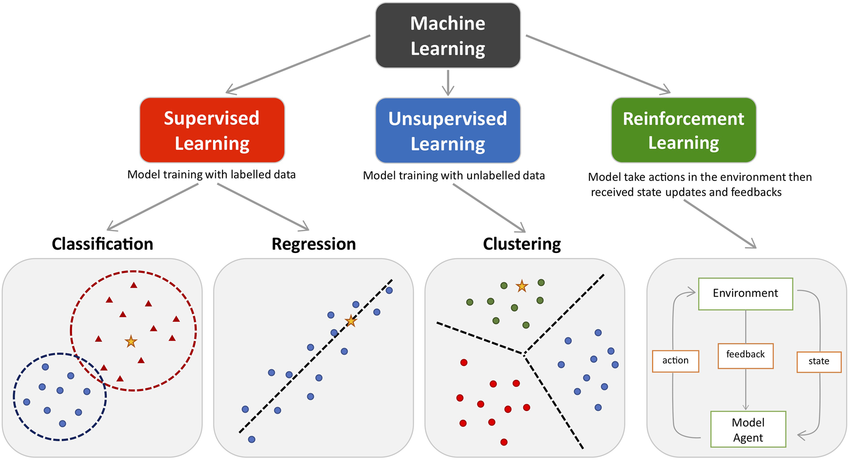

[Image Source](https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png).

**Supervised Learning:** *In supervised learning, the algorithm is trained on a labelled dataset, where each input data point is paired with the correct output (label).* The goal is to learn a mapping from inputs to outputs based on the training data. Once trained, the model can make accurate predictions on new, unseen data. This approach is commonly used for tasks like classification and regression, where the correct answers are known during training.

**Unsupervised Learning:** *In unsupervised learning, the algorithm works with an unlabeled dataset, meaning the data has no predefined labels or outcomes.* The objective is to discover patterns, structures, or relationships within the data. This might involve grouping similar data points (clustering) or reducing the dimensionality of the data to uncover hidden patterns. Unsupervised learning is often used in exploratory data analysis and for finding natural groupings in data.

**Reinforcement Learning:** *In reinforcement learning, the algorithm learns to make decisions by interacting with an environment.* The learner, known as the *agent*, takes actions and receives feedback in the form of rewards or penalties. The goal is to learn a strategy, or *policy*, that maximizes the cumulative reward over time. Reinforcement learning is commonly applied in areas like robotics, game playing, and autonomous systems, where an agent must learn to navigate complex environments.

**Exercise 1.3**: Can you identify to which of the categories the following task belongs?
  - Teaching a robot how to walk. - Reinforcement
  - Weather prediction. - supervised
  - Spam email classification. - unsupervised
  - Teach a computer how to play chess. - reinforcement
  - Grouping together different kinds of movie reviews. - unsupervised

In [ ]:
# @title Solution - Exercise (Try not to peek until you've given it a good try!')
print("Teaching a robot how to walk -- Reinforcement learning")
print("Weather prediction -- Supervised learning")
print("Spam email classification -- Supervised learning")
print("Teach a computer how to play chess -- Reinforcement learning")
print("Grouping together different kinds of movie reviews -- Unsupervised learning")

Teaching a robot how to walk -- Reinforcement learning
Weather prediction -- Supervised learning
Spam email classification -- Supervised learning
Teach a computer how to play chess -- Reinforcement learning
Grouping together different kinds of movie reviews -- Unsupervised learning


## **1.5 Modern Terminology**

In recent years, several new concepts and terms have emerged in ML. We will briefly discuss some of these modern terminologies that might be relevant to your learning journey:

<details>
  <summary><strong>General Terminology (Click Me)</strong></summary>

  - **Deep learning**: A branch of ML that uses neural networks with many layers to learn complex patterns in data. These networks are especially good at handling large, unstructured data like images, audio, and text. Deep learning has made significant advances in areas like image recognition and language processing. We’ll dive deeper into this topic in Section 2 and 3.
  - **Self-supervised learning**: A learning approach where the model learns from the data itself without requiring explicit labels. The model is trained to predict certain parts of the input data based on other parts, effectively creating its own supervision signal. This is different from supervised learning, where the model learns from labelled examples provided by humans, and unsupervised learning, where the model learns patterns from unlabeled data. Self-supervised learning has gained popularity due to its ability to leverage large amounts of unlabeled data for training.
</details>

<details>
  <summary><strong>Generative-modelling Terminology (Click Me)</strong></summary>

  - **Generative vs Discriminative Models**: Generative models create new data similar to existing data (like generating new images) by learning the underlying data distribution. In contrast, discriminative models classify or distinguish between different types of data (like classifying images). Examples of generative models include Generative Adversarial Networks (GANs), Variational Autoencoders (VAEs), and Autoregressive Models, useful for tasks like image and text generation.
  - **Autoregressive Models**: These models generate sequences by predicting the next element based on previous ones. They're commonly used in text generation, music composition, and time series forecasting. **Large Language Models (LLMs)** like GPT-3 use this approach, predicting the next word in a sentence based on the previous words. **Transformers**, a type of neural network used in LLMs, excel at processing sequences in parallel. If you want to learn more, check out the [LLM 2023](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/large_language_models.ipynb) and [2024 practicals](https://github.com/deep-learning-indaba/indaba-pracs-2024/tree/main).

  - **Diffusion models**: These models generate data by reversing a process of adding noise. For example, they start with a noisy image and learn to remove the noise to produce a clear image. Diffusion models have been successful in generating high-quality images, with examples like Imagen and DALL-E. For more details, explore the [diffusion practical](https://github.com/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Diffusion_Models/Diffusion_Models.ipynb).
</details>

# **Part 2 - Building a Deep Learning Model from scratch** - 50 minutes ⏰

Before the explosion of deep learning techniques, fitting pre-defined functions to datasets was the go-to machine learning approach. Examples of classical algorithms using this approach include <font color='red'>support vector machines, naive Bayes</font> and many others (see [sklearn](https://scikit-learn.org/stable/supervised_learning.html) for a more exhaustive list).

In this section, we’ll focus on deep learning fundamentals and implement them step by step using basic Python functions and NumPy operations.

## 2.1 **What is a Neural Network?**
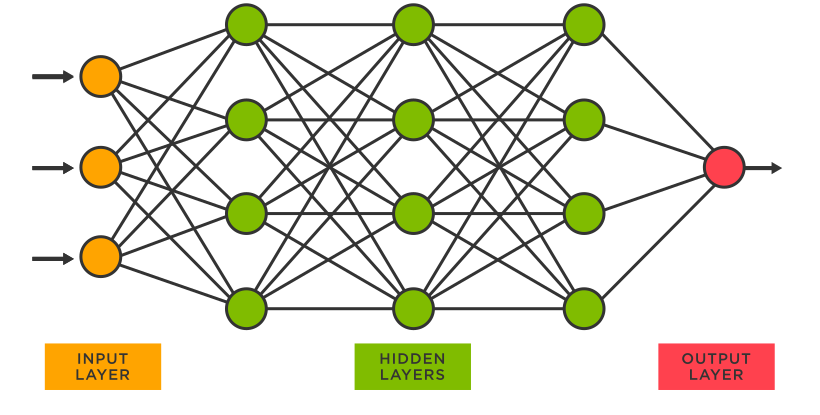

  Image of a neural network with 3 hidden layers. Credit: [Tibco.com](https://www.tibco.com/reference-center/what-is-a-neural-network)



Neural networks are a powerful class of machine learning models inspired by how the human brain functions. Unlike in traditional function fitting, where a single transformation is applied to the data, neural networks process input data through a series of transformations before reaching the final predictive layer. The term <font color='red'>Deep Learning</font> arises from the numerous transformations applied to the input data.

In the image above, the circles represent nodes, and the links connecting them represent the model's weights (also called parameters).

## 2.2 **Forward Propagation**
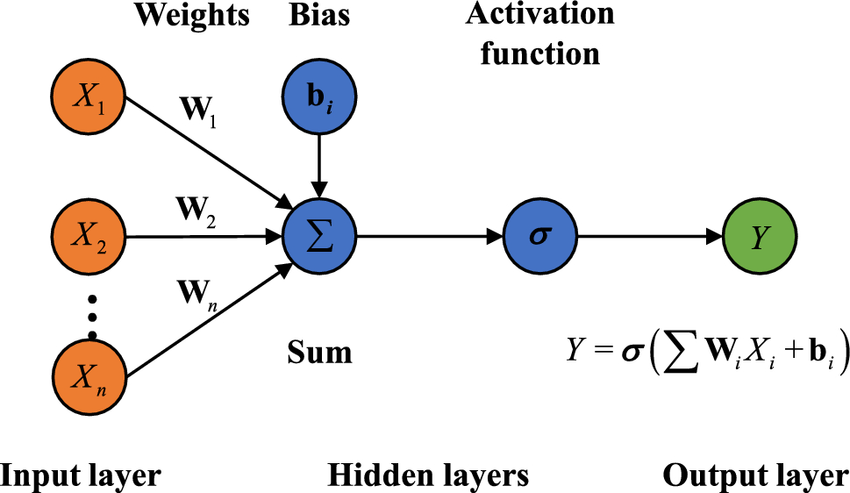

 Image of single neuron computation. Credit: [Physics-informed_deep_learning_method_for_predicting_tunnelling-induced_ground_deformations](https://www.researchgate.net/publication/370026954_Physics-informed_deep_learning_method_for_predicting_tunnelling-induced_ground_deformations)     

At the core of a neural network is a neuron also called node. The figure above illustrates how we compute the output of a neuron based on its inputs i.e. output of the neurons from the preceding layer. The expression $$ Y = σ\left(∑w_ix_i + b\right)$$ represents output computation at a single node. If we consider the terms in bracket only we have $$ f = ∑w_ix_i + b_i,$$ hence the fundatamental computation needed is a linear. Here $x_i$ and $w_i$ represents the input and weight for the feature $i$ while $b$ is called the bias term.
This computation can be rewritten as a dot product or matrix multiplication to obtain the following expression $$ f = \mathbf{w}^T\mathbf{x} + b.$$ Note that we use bold symbols here to indicate we are using matrices.

**Code task:**

In the above cell, we introduced the linear function which is a key operation required to implement neural networks. When implementing a machine learning model we want to take advantage of linear algebra techniques and available computing resources to process a batch of data at once.

Given datasets $\mathbf{X}$ with multiple examples stacked in the matrix, write a function that applies a linear model to every example.


In [ ]:
# @title Your code here
def linear_model(w: np.array, b: np.array, X: np.array) -> np.array:
  # complete this code

  m = (w * X) + b

  return m

In [ ]:
# @title Run me to test your code

def test_linear_model():
  X = np.array([[210], [160], [240], [140], [300]])
  w = np.array([[2.0]])
  b = np.array([[1.0]])
  print(X.shape, w.shape, b.shape)
  expected = np.array([[210*2], [160*2], [240*2], [140*2], [300*2]]) + 1
  output = linear_model(w, b, X)
  assert (expected == output).all(), "Test failed!"
  print("Nice! Your answer looks correct.")

test_linear_model()

(5, 1) (1, 1) (1, 1)
Nice! Your answer looks correct.


In [ ]:
# @title Solution - linear model (Try not to peek until you've given it a good try!')
def linear_model(w: np.array, b: np.array, X: jnp.ndarray) -> jnp.ndarray:
  # compute m = f(x) here using w,b and X
  m = X@w.T + b

  return m

Now that we know how to compute the term in bracket our neuron network computation, let define what's compute the full expression. We need to apply the $σ$ function to othe linear function output. This function is called an <font color='red'>activation function</font>.

**What exactly are activation functions?**
Activation functions are essential in neural networks. The input to every node is a linear function of all the nodes from the previous layer. Without applying an activation function, also called a non-linearity, the entire neural network, no matter how many layers it has, reduces to a simple linear model. Thus, activation functions are used to break the linearity and ensure that we build a complex non-linear function.

Some popular activation functions include:

- $\text{ReLU}(x) \, = \, \text{max}(0, x)$

    The Rectified Linear Unit (ReLU) is the most popular activation function. It maps it input to range $[0, ∞]$ mapping all negativie values to 0. Both the function and its derivative are monotonic. However this activation function has the problem it turns all negative inputs to 0 and decreases the ability of the model to fit data properly.

- $\text{Sigmoid}(x) \, =\, \frac{1}{1+e^{-x}}$

    The sigmoid activation maps input the range $[0, 1]$. This is ideal for predicting probabilities. The function is differentiable and monotonic but its derivative is not monotonic. Because its derivative is not monotonic it is not ideal to use this activation in hidden layers as it blocks information transfer between layers. Hence most often activation is applied only to output layers.

- $\text{tanh}(x)\, = \, \frac{e^x - x^{-x}}{e^x + e^{-x}},$
  
     The $tanh$ activation is similar to the sigmoid activation but it maps inputs to range $[-1, 1]$. This wider range allows for a much better spread when predicting probabilities. Similarly to the sigmoid activation, the $tanh$ is most often applied to the output layers of neural networks.



Let's implement the popular [ReLU](https://arxiv.org/https://arxiv.org/abs/1803.08375abs/1803.08375) activation function.



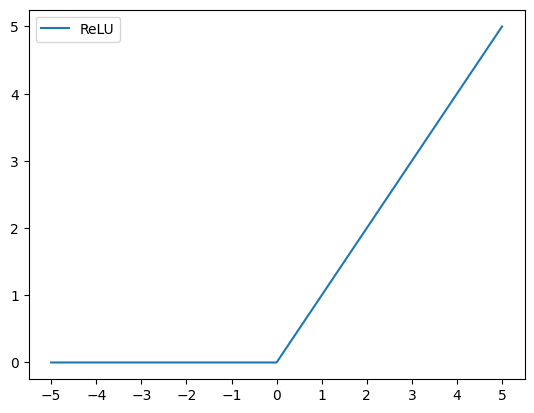

In [ ]:
# Implementation of relu using simple python.

def relu(x):
  return np.maximum(0, x)

def plot_activation(act_fn, label="act_fn"):
    max_int = 5
    # Generete 100 evenly spaced points from -max_int to max_int
    x = np.linspace(-max_int, max_int, 1000)
    y = act_fn(x)
    plt.plot(x, y, label=label)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.show()

plot_activation(relu, label='ReLU')

**Code Task:** Implement and plot another activation function of your choice.

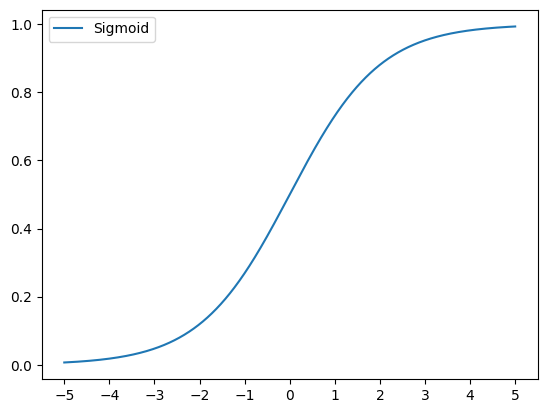

In [ ]:
# @title Your code here
def act_fn(x):
    # type your code here

    y = 1 / (1 + np.exp(-x))
    return y

# Call the plotting function
plot_activation(act_fn, label="Sigmoid") # update this

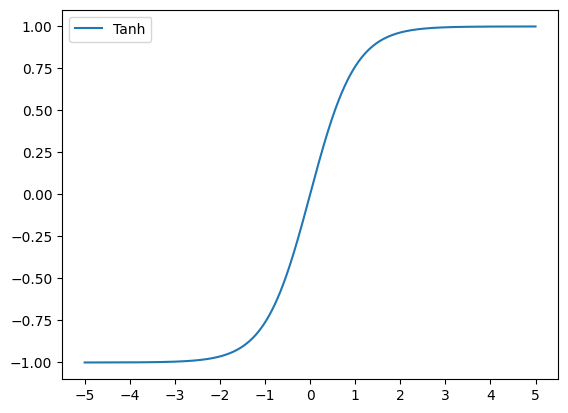

In [ ]:
# @title Your code here
def act_fn(x):
    # type your code here

    y = np.tanh(x)
    return y

# Call the plotting function
plot_activation(act_fn, label="Tanh")

<details>
  <summary><strong>Types of Neural Networks (Click Me)</strong></summary>
  
* Feedforward Neural Networks: This basic type processes data linearly from input to output, without loops. They're commonly used for tasks where the input features in the data are completely unrelated.

* Recurrent Neural Networks (RNNs): Designed for sequential data like time series and texts. RNNs use a feedback loop to keep memories of previous inputs, making them suitable for sequential data.

* Convolutional Neural Networks (CNNs): Specifically designed for image-related tasks, CNNs extract features from images using a convolutional layer, which identifies patterns like edges and shapes.

* Generative Adversarial Networks (GANs): Composed of a generator and a discriminator, GANs pit these two components against each other. The generator creates data while the discriminator assesses its authenticity. This adversarial process results in the generator producing increasingly realistic data, often used for generating images, videos, and audio.
</details>

**Let implement the full forward pass of a feedforward neural network**

Now that we know how to compute the output of a single neuron in neural network, we will now try propagate information across the layers from the input features through the hiddens to the final predicted output. This is refered to as the <font color='red'>forward pass</font>.

Let consider the neural network below.

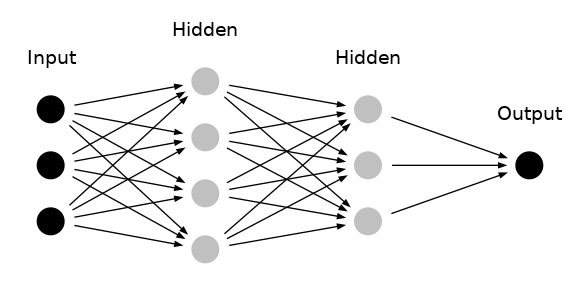

**Exercise 2.1**: Consider the network in the figure above. If we have inputs of size B i.e. we pass B examples to the network at a time, can you write out what is shape of the output at every layer. Let assume B is 5. Hint: think about what the weights should be for each layer.

In [ ]:
# @title Your solution here
B = 5
input_layer = (5, 3) # update me. for example you can put (5, 2) if think the shape is 5 by 2
hidden_layer_1 = (3, 4) # update me
hidden_layer_2 = (4, 3)  # update me
output_layer = (3, 1) # output layer

In [ ]:
# @title Run me to check your anwsers
def test_shape_understanding():

  if input_layer == (5, 3):
    print("You got the right shape for the input layer!")
  else:
    print("The correct shape for the input layer is (5,3)")

  if hidden_layer_1 == (5, 4):
    print("You got the right shape for the first hidden layer!")
  else:
    print("The correct shape for the first hidden layer is (5,4)")

  if hidden_layer_2 == (5, 3):
    print("You got the right shape for the second hidden layer!")
  else:
    print("The correct shape for the second hidden layer is (5,3)")

  if output_layer == (5, 1):
    print("You got the right shape for the output layer!")
  else:
    print("The correct shape for the output layer is (5,1)")


  return

test_shape_understanding()

You got the right shape for the input layer!
The correct shape for the first hidden layer is (5,4)
The correct shape for the second hidden layer is (5,3)
The correct shape for the output layer is (5,1)


Now that we know the output shapes at every layer, we can implement our neural network function forward pass. Before that let initialse our parameters with some random values. Generally, when implementing neural networks for deeplearning models we store all the parameters together in dictionary object using different layers as keys.

In [ ]:
np.ones((4,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
# @title Helper function: intialise parameters
params = {}
params["layer_0"] = {}
params["layer_0"]["w"] = 3*np.ones((4,3)) # since the input layer has 3 features and next layer has 4 neurons
params["layer_0"]["b"] = 0.5*np.ones((4))

params["layer_1"] = {}
params["layer_1"]["w"] = 2*np.ones((3,4)) # since the input layer has 3 features and next layer has 3 neurons
params["layer_1"]["b"] = 2*np.ones(3)

params["layer_2"] = {}
params["layer_2"]["w"] = 3*np.ones((1,3)) # since the input layer has 3 features and next layer has 1 neurons
params["layer_2"]["b"] = 0.5*np.ones(1)

X = np.random.rand(5,3) # we will use this for testing

**Code Task**: Implement a function that does the forward bass for the neural network above using relu as activation function for the intermediate layers.

In [ ]:
# @title Your code here
def forward_pass(params: dict, X: np.array) -> np.array:
  # complete this code

  w0 = params["layer_0"]["w"]
  b0 = params["layer_0"]["b"]
  z1 = linear_model(w0, b0, X) # first linear layer
  a1 = relu(z1) # apply activation

  w1 = params["layer_1"]["w"]
  b1 = params["layer_1"]["b"]
  z2 = linear_model(w1, b1, a1)
  a2 = relu(z2)

  w2 = params["layer_2"]["w"]
  b2 = params["layer_2"]["b"]
  z3 = linear_model(w2, b2, a2)

  cache = (z1, a1, z2, a2, z3)
  return z3, cache

z, _ = forward_pass(params, X)
assert z.shape == (5,1)
print("Congratulations!, you got the right output shape. Check below if your implementation is similar to ours!")

Congratulations!, you got the right output shape. Check below if your implementation is similar to ours!


In [ ]:
# @title Solution - linear model (Try not to peek until you've given it a good try!')
def forward_pass(params: dict, X: np.array) -> np.array:
  # complete this code

  w0 = params["layer_0"]["w"]
  b0 = params["layer_0"]["b"]
  z1 = linear_model(w0, b0, X) # first linear layer
  a1 = relu(z1) # apply activation

  w1 = params["layer_1"]["w"]
  b1 = params["layer_1"]["b"]
  z2 = linear_model(w1, b1, a1)
  a2 = relu(z2)

  w2 = params["layer_2"]["w"]
  b2 = params["layer_2"]["b"]
  z3 = linear_model(w2, b2, a2)

  cache = (z1, a1, z2, a2, z3)

  return z3, cache

## 2.3 **Loss functions**

Whenever we are fitting a model to some data, we need a function to measure how well the model is performing. This function is called the **loss function**. It measures the amount of errors between our model and data.



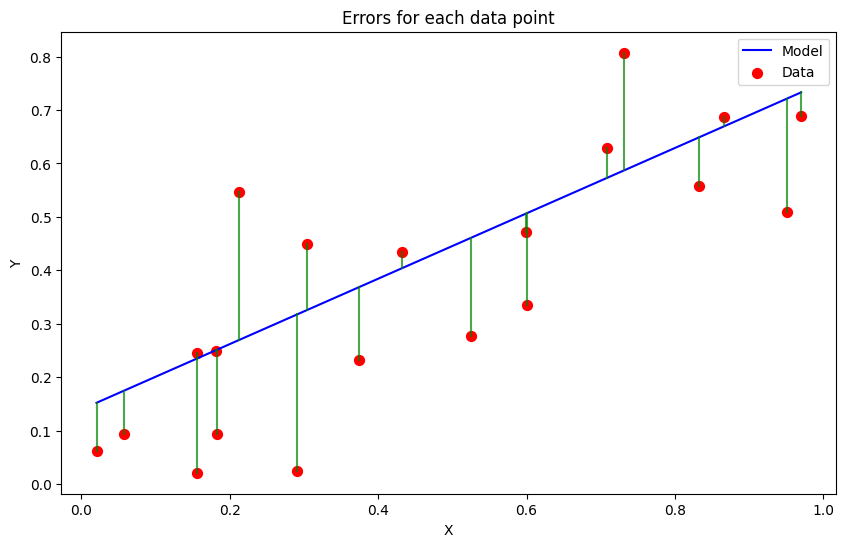

In [ ]:
# @title Helper code to plot errors (Run me)

# Set random seed for reproducibility
np.random.seed(42)

# Number of points to generate
num_points = 20

# Generate random points and lines
points_x = np.random.rand(num_points)
slope_random_line = np.random.rand()
intercept_random_line = np.random.rand()

# Simulating the points y value with some distortion to using y = mx + c + randomness
points_y = slope_random_line * points_x + (intercept_random_line + np.random.normal(0, 1, num_points)*0.15)

# Create the scatter plot of distances
plt.figure(figsize=(10, 6))

# Plot the random line
plt.plot(np.sort(points_x), slope_random_line * np.sort(points_x) + intercept_random_line, c='blue', label='Model')

# Plot the points
plt.scatter(points_x, points_y, c='red', label='Data', marker='o', s=50)

# Plot lines from each point to the random line (in different colors)
for i in range(num_points):
    plt.plot([points_x[i], points_x[i]], [points_y[i], slope_random_line * points_x[i] + intercept_random_line],
             c='green', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Errors for each data point")
plt.legend()
plt.show()

Consider the figure above with data points in red. If the blue line is our model, then vertical green lines represent the errors we make on each data point. The loss function tries to capture the total error we make for every data point. One loss function we can use in this case is the <font color='red'>mean square error</font> between the predicted and the true values. This is equivalent to summing up all the distances in green. This can be written mathematically as follows:
$$ \mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}({y_i - \hat{y}_i})^2,$$
where $\mathbb{θ} = [\mathbf{w}, b]$,  $\mathcal{L}$ denotes the loss function, $y$ represents the actual or expected value, $\hat{y}$ represents the predicted value by the model and $m$ is the total number of datapoints.

<font color='red'>Note: they are different loss functions we could use in this case. You can see some other common loss functions [here](https://www.geeksforgeeks.org/ml-common-loss-functions/).</font>

**Code task:** Implement the loss function above using the forward_pass model function defined above.

In [ ]:
# @title Your code here
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred, cache = forward_pass(params, X) # update me

  loss = np.sum((y - pred) ** 2) / np.size(y) # your code here

  return loss

In [ ]:
# @title Run to test my code
def test_linear_loss_fn():
  pred, cache = forward_pass(params, X)
  y = np.ones(pred.shape)
  loss = np.mean((pred-y)**2)
  assert loss_fn(params, X, y) == loss
  print("Nice! Your answer looks correct.")

test_linear_loss_fn()

Nice! Your answer looks correct.


In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred, cache = forward_pass(params, X)

  loss = np.mean((pred-y)**2)

  return loss

## 2.4 **Optimization**
Optimization as the name entails is the process of finding the optimal parameters of a model under a given dataset, i.e. the set of parameters that gives the minimum loss possible. Mathematically this is represented as follows

$$\hat{\theta} \,= \, \underset{\mathbf{\theta}}{\operatorname{argmin}} \mathcal{L}(\mathbb{θ}).$$

<font color='red'> How do we optimise </font>: The figure below is an example plot of the loss at different values of $\mathbf{w}$ and $b$ for a straight line. The minimum value is indicated with the star. Our goal in optimization is to identify this point.

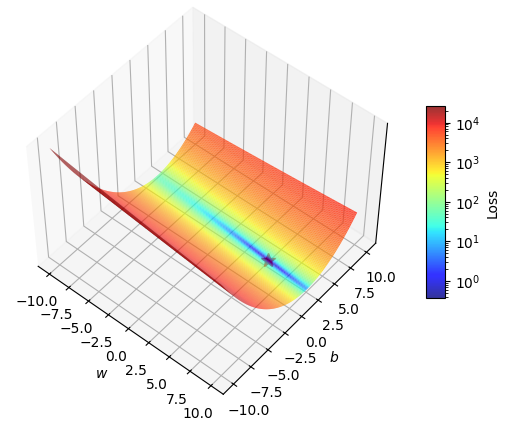

In [ ]:
# @title Helper code (to visualise loss landscape)
# Define the loss function (Mean Squared Error)
from matplotlib.colors import LogNorm

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Create a grid of weight (slope) and bias (intercept) values
weight_values = np.linspace(-10, 10, 200)
bias_values = np.linspace(-10, 10, 200)
weight_grid, bias_grid = np.meshgrid(weight_values, bias_values)

# Generate random data points for demonstration
np.random.seed(0)
x = np.linspace(0, 20, 200)
y_true = 3 * x + 5 + 0.1 * np.random.normal(0, 1, 200)
# use y_min = mx+c again to simulate the predicted values
y_min = 3*x + 5
minima = np.array([5, 3])
loss_min = loss_function(y_true, y_min)

# Compute the loss for each combination of weight and bias values
loss_grid = np.zeros_like(weight_grid)
for i in range(len(weight_values)):
    for j in range(len(bias_values)):
        y_pred = weight_values[i] * x + bias_values[j]
        loss_grid[i, j] = loss_function(y_true, y_pred)

# Plot the Loss Grid
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

surf = ax.plot_surface(weight_grid, bias_grid, loss_grid, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima, loss_min, 'r*', markersize=10)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
# Remove z-axis ticks and labels
ax.set_zticks([])
ax.set_zticklabels([])

# Add color bar for reference
cbar = plt.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel('Loss')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))
plt.show()

A **brute force** approach will be to compute the loss function for a large range of possible parameter values and select the parameters with the minimum loss value. While such an approach can work for simple models with 1 or 2 parameters, this is a very tedious approach and the number of possible values to evaluate for large models makes such an approach impractical.


**Gradient based optimization**

The right approach is to use calculus. The derivative of a function is known to be 0 at every turning point (maximum and minimum turning points). Hence to find $\theta$, which minimises the loss, we need to solve the equation
$$\frac{\partial \mathcal{L}}{\partial \theta} \,=\, 0.$$

It is possible to workout the exact expression of the derivatives for simple models but this very difficult and tediuous to do for bigger models. However if we have an approach with which we can estimate the value of this derivative for a given value of $\theta$, then we can progressively modify $\theta$ untill we converge to the minimum. One popular algorithm for this in machine learning is the use of the <font color='red'>gradient descent algorithm</font>. The algorithm works as follows:

1.   Initialise the parameters with random values.
2.   Loop for a number of iterations and during each iteration update the parameters using the following formula.

$$ \mathbf{\theta} = \mathbf{\theta} - η\frac{∂\mathcal{L}}{∂\theta},         \tag{Eq. 1}$$
$\eta$ is called the learning rate. It is a hyperparameter of the gradient descent algorithm meaning we have to choose it beforehand.

**How do we compute derivatives?**

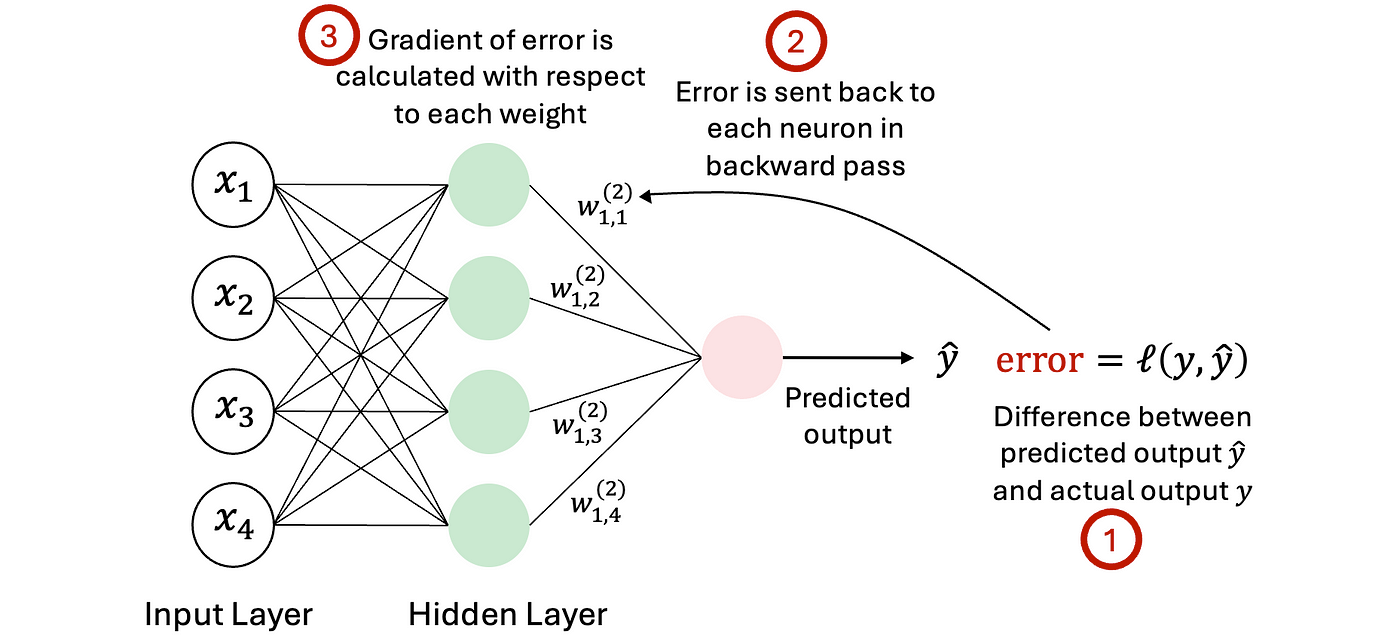

Image: Backprogration illustration. Credit: [Medium](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40lmpo%2Fbackpropagation-the-backbone-of-neural-network-training-64946d6c3ae5&psig=AOvVaw3dUp-Prvedf7c07LzYoHxu&ust=1752132484135000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCMiTqaSgr44DFQAAAAAdAAAAABBq)

The most common way to compute (approximate) derivatives for a neural network is to use the <font color='red'>backprogration algorithm</font>. To achieve this we propagate the errors starting from the final output back through the network from right to left. The key ingredient that makes this possible is the chain rule for differentiation i.e. for some intermediate function $z$ we have

$$\frac{\partial \mathcal{L}}{\partial x} = \frac{\partial \mathcal{L}}{\partial z}  \frac{\partial z}{\partial x}.$$

Recall, the forward pass equations can be written as follows:

\begin{aligned}
z_1 &= \mathbf{w}_1^T\mathbf{x} + b_1 \\
a_1 &= \text{ReLU}(z_1) \\
z_2 &= \mathbf{w}^T a_1 + b_2 \\
a_2 &= \text{ReLU}(z_2) \\
z_3 &= \mathbf{w}^T a_2 + b_3 \\
\hat{y} &= z_3
\end{aligned}

Then using the chain rule starting from the mean square loss function, the following equations are the corresponding equations for the backward pass:

\begin{aligned}
\delta_3 &= \frac{1}{m} (\hat{y} - y) \\
\nabla \mathbf{w}_3 &= \delta_3^T A_2 \\
\nabla b_3 &= \sum_{i=1}^m \delta_3^{(i)} \\[10pt]
\delta_2 &= (\delta_3 \mathbf{w}_3) \odot \text{ReLU}'(Z_2) \\
\nabla \mathbf{w}_2 &= \delta_2^T A_1 \\
\nabla b_2 &= \sum_{i=1}^m \delta_2^{(i)} \\[10pt]
\delta_1 &= (\delta_2 \mathbf{w}_2) \odot \text{ReLU}'(Z_1) \\
\nabla \mathbf{w}_1 &= \delta_1^T X \\
\nabla b_1 &= \sum_{i=1}^m \delta_1^{(i)}
\end{aligned}

where $\text{ReLU}'$ denotes the derivative of the relu activation function and $\odot$ is stands for element wise matrix multiplication.

**Code task <font color='blue'> (Optional exercise)</font>:** Implement the backward pass for our 4 layer neural network using the equations above. Note: the reason we keep a copy of all the intermediate outputs during the forward pass is because we need them during the backward pass to avoid repeating the same computations.

In [ ]:
# @title Your code here

def relu_derivative(x):
    return (x > 0).astype(float)

def backward_pass(params, X, y, cache):
    # update this function to compute the gradients and return them in a similar dictionary as the params
    z1, a1, z2, a2, z3 = cache
    y_hat = z3
    m = y.shape[0]
    w3 = params["layer_2"]["w"]
    w2 = params["layer_1"]["w"]

    ...
    ...

    grads = {}
    grads["layer_0"]["w"] = ...
    grads["layer_0"]["w"] = ...
    grads["layer_0"]["b"] = ...

    grads["layer_1"] = {}
    grads["layer_1"]["w"] = ...
    grads["layer_1"]["b"] = ...

    grads["layer_2"] = {}
    grads["layer_2"]["w"] = ...
    grads["layer_2"]["b"] = ...

    return grads


def check_shapes_match(params, grads):
    for layer in params:
        for key in params[layer]:
            if params[layer][key].shape != grads[layer][key].shape:
                print(f"Shape mismatch in {layer} for '{key}': "
                      f"params shape = {params[layer][key].shape}, "
                      f"grads shape = {grads[layer][key].shape}")
                return False
    print("✅ All parameter and gradient shapes match. Now check below confirm you got everything right!")
    return True

y = np.random.rand(5,1)
y_hat, cache = forward_pass(params, X)
grads = backward_pass(params, y, cache)
assert check_shapes_match

In [ ]:
# @title Sample solution (Try not to peek until you've given it a good try!')
def relu_derivative(x):
    return (x > 0).astype(float)

def backward_pass(params, X, y, cache):
    # update this function to compute the gradients and return them in a similar dictionary as the params
    z1, a1, z2, a2, z3 = cache
    y_hat = z3
    m = y.shape[0]
    w3 = params["layer_2"]["w"]
    w2 = params["layer_1"]["w"]

    # Output layer gradient
    delta3 = (y_hat - y) / m                             # (m, 1)
    dW3 = delta3.T @ a2                                  # (1, h2)
    db3 = np.sum(delta3, axis=0)                         # (1,)

    # Hidden layer 2
    delta2 = (delta3 @ w3) * relu_derivative(z2)         # (m, h2)
    dW2 = delta2.T @ a1                                  # (h2, h1)
    db2 = np.sum(delta2, axis=0)                         # (h2,)

    # Hidden layer 1
    delta1 = (delta2 @ w2) * relu_derivative(z1)         # (m, h1)
    dW1 = delta1.T @ X                                   # (h1, d)
    db1 = np.sum(delta1, axis=0)                         # (h1,)


    dW1, db1, dW2, db2, dW3, db3
    grads = {}
    grads["layer_0"] = {}
    grads["layer_0"]["w"] = dW1
    grads["layer_0"]["b"] = db1

    grads["layer_1"] = {}
    grads["layer_1"]["w"] = dW2
    grads["layer_1"]["b"] = db2

    grads["layer_2"] = {}
    grads["layer_2"]["w"] = dW3
    grads["layer_2"]["b"] = db3

    return grads

y = np.random.rand(5,1)
y_hat, cache = forward_pass(params, X)
grads = backward_pass(params, X, y, cache)

## 2.7 **Putting it all together**
Now we have all the pieces required to implement our learning algorithm. As mentionned earlier, we can use the gradient descent to update the parameters of the model.

In [ ]:
# @title Code demonstration: Batch gradient descent implementation

def value_and_grad(params, X, y):
  """Helper function to compute the loss and the gradients of the parameters"""
  y_hat, cache = forward_pass(params, X)
  grads = backward_pass(params, X, y, cache)
  loss = np.mean((y_hat-y)**2)

  return loss, grads

def update_params(params, grads, learning_rate):
    for layer in params:
        for key in params[layer]:
            params[layer][key] = params[layer][key] - learning_rate * grads[layer][key]

    return params

def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = value_and_grad

  n_iter = 0 # number iterations
  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)
    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]

      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = update_params(params, grads, learning_rate)

    loss_train.append(np.mean(loss_train_epoch))
    # Compute the validation loss
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Plot training and validation loss
  # Only plot after a few iterations because initial loss is too high
  iters = range(1, num_epochs+1)
  plt.plot(iters[1:], loss_train[1:], label='Training Loss')
  plt.plot(iters[1:], loss_val[1:], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

In [ ]:
# @title Let’s create some dummy data to test the code.
def create_dummy_data():
  """We will generate some random data using our linear function above to test the gradient decent implementation"""

  num_samples = 2300
  num_features = 3  # Modify this to have more features

  # Generate random X values in the range [0, 10] for each feature
  X = np.random.uniform(0, 10, size=(num_samples, num_features))
  y, _ = forward_pass(params, X)

  # Add some noise
  noise = np.random.normal(size=(num_samples,1))*5
  print(np.max(y), np.min(y), np.max(noise), np.min(noise))
  y = y + noise

  # Split the data into training and validation sets
  train_fraction = 0.8
  num_train_samples = int(train_fraction * num_samples)

  # Get the corresponding data points for training and validation sets
  X_train, y_train = X[0:num_train_samples], y[0:num_train_samples]
  X_val, y_val = X[num_train_samples:], y[num_train_samples:]

  train_data = (X_train, y_train)
  val_data = (X_val, y_val)

  # create some random initial params
  initial_params = {}
  initial_params["layer_0"] = {}
  initial_params["layer_0"]["w"] = np.random.rand(4,3)
  initial_params["layer_0"]["b"] = np.zeros(4)

  initial_params["layer_1"] = {}
  initial_params["layer_1"]["w"] = np.random.rand(3,4)
  initial_params["layer_1"]["b"] = np.zeros(3)

  initial_params["layer_2"] = {}
  initial_params["layer_2"]["w"] = np.random.rand(1,3)
  initial_params["layer_2"]["b"] = np.zeros(1)

  return train_data, val_data, initial_params

In [ ]:
train_data, val_data, initial_params = create_dummy_data()

6443.594036245349 281.2608915228099 15.436146673489075 -19.353294846330044


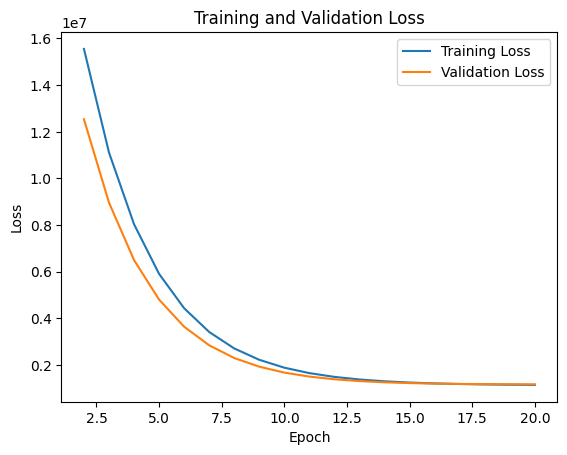

In [ ]:
fit_params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=1e-3, num_epochs=20, batch_size=10)

**Congratulations!** 🎊, we've succesfully implemented and trained a multi layer neural network from scatch using on numpy operations only. Take some time to digest all this information and trying understanding the code for the batch gradient descent algorithm. We haven't spoken much about how we select the hyperparameters but we will provide more details on this in the next parts of this practical.

# **Part 3 - Building bigger models using specialised DL framworks** - 30 minutes ⏰

In the previous section, we implemented a simple 3-layer neural network from scratch using NumPy. Even though this network had only 3 layers and at most 4 neurons per layer, it was already clear how **tedious and error-prone** the process can be. Now imagine trying to implement a **state-of-the-art deep learning model** like the one powering ChatGPT in the same way. It would be extremely strenuous, and we're likely to make many mistakes just trying to remember all the necessary details.

Moreover, modern deep learning models are trained on massive datasets and require **GPU** or **TPU acceleration** for efficient training and inference. These setups often rely on **distributed data processing**, which is incredibly hard to manage manually. Fortunately, we don’t have to do everything from scratch. We can leverage powerful, high-performance deep learning frameworks like [JAX](https://docs.jax.dev/en/latest/) and [PyTorch](https://pytorch.org/get-started/locally/). These tools **abstract away the complex mathematical and hardware-level details**, letting us focus on designing and training models faster and more reliably.

In this section we will briefly introduce JAX which is the framework we will use for most of the practicals this year.

## 3.1 **Brief Introduction to JAX**


[JAX](https://jax.readthedocs.io/en/latest/index.html) is a Python package/framework designed for high-performance numerical operations and machine learning. It can be seen as an accelerated version of NumPy and is commonly used with higher-level neural network libraries such as [Flax](https://github.com/google/flax).

### Similarities ✅

JAX and NumPy both allow you to do array-based operations, using a similar interface. This means you can run many of your favourite NumPy operations in Jax, using a similar API.

Let's do some basic operations in both.

In [ ]:
import numpy as np
import jax.numpy as jnp

def print_comparison(title, np_result, jax_result):
    print(f"\n{title}")
    print("=" * 40)
    print(f"NumPy: {np_result}")
    print(f"JAX:   {jax_result}")
    print("-" * 40)

# Create arrays for use in examples
np_array1, np_array2 = np.array([1, 2, 3]), np.array([4, 5, 6])
jax_array1, jax_array2 = jnp.array([1, 2, 3]), jnp.array([4, 5, 6])

Indexing and Slice - `[]` - Accessing elements in an array. E.g. `array[0]` to get the first element, or `array[1:3]` to get elements 1 and 2.

In [ ]:
np_slice = np_array1[1:4]
jax_slice = jax_array1[1:4]
print_comparison("Array Slicing", np_slice, jax_slice)


Array Slicing
NumPy: [2 3]
JAX:   [2 3]
----------------------------------------


Matrix Multiplication - `.dot` - Multiplying two matrices together.

In [ ]:
# Create arrays for use in examples
np_matrix = np.array([[1, 2], [3, 4]])
jax_matrix = jnp.array([[1, 2], [3, 4]])

np_matmul = np.dot(np_matrix, np_matrix)
jax_matmul = jnp.dot(jax_matrix, jax_matrix)
print_comparison("Matrix Multiplication", np_matmul, jax_matmul)


Matrix Multiplication
NumPy: [[ 7 10]
 [15 22]]
JAX:   [[ 7 10]
 [15 22]]
----------------------------------------


### Differences ❌

Although JAX and NumPy have some similarities, they do have some important differences. We will discuss some of the API differences here.

**Randomness in NumPy vs JAX**

JAX requires you to be more explicit when generating random numbers. You have to pass in a key each time you call a function that has some randomness.

Let's see the differences in how JAX and NumPy generate random numbers.

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

# Generate random numbers using NumPy
np.random.seed(0)
np_rand = np.random.rand(3)
print(f"NumPy Random: {np_rand}")

# Generate random numbers using JAX
key = random.PRNGKey(0)
jax_rand = random.uniform(key, (3,))
print(f"JAX Random: {jax_rand}")

NumPy Random: [0.5488135  0.71518937 0.60276338]
JAX Random: [0.947667   0.9785799  0.33229148]


In JAX, you need to pass a key to the random functions **every time** you call it. This key is used to generate random numbers in a reproducible way. You can think of the key as a seed for the random number generator.

Generating multiple random numbers in JAX requires you to create new keys (using `split`) each time you call the random function. This ensures that the random numbers are independent of each other.

## 3.2 **Core Jax Primitives - `jit` and `grad`**

In this section, we will briefly mention two common JAX transforms: `jit` and `grad`.

### `jit` - Just-In-Time Compilation

jit (Just-in-time compilation) - compiles and caches JAX Python functions so that they can be run efficiently on XLA to *speed up function calls*.

`jit` takes in a Python function and returns a compiled version of that function. Simply wrap your function with `jax.jit` to compile it and call it:

In [ ]:
import jax
import jax.numpy as jnp

# Define a simple function to add two arrays
def add(a, b):
    return jnp.add(a, b)

# Use JIT to compile the function
add_jitted = jax.jit(add)

# Create some example arrays
x = jnp.array([1.0, 2.0, 3.0])
y = jnp.array([4.0, 5.0, 6.0])

# Call the jitted function
result = add_jitted(x, y)
print(result)

[5. 7. 9.]


There are rules about what kinds of functions can be compiled with `jit`. For example, functions that contain Python control flow (like loops or conditionals) may not be compatible with `jit`. You can find more information about `jit` in the [JAX documentation](https://jax.readthedocs.io/en/latest/jit-compilation.html#why-can-t-we-just-jit-everything).

### `grad` - Automatic Differentiation

`grad` is used to automatically compute the gradient of a function in JAX. It can be applied to Python and NumPy functions, which means you can differentiate through loops, branches, recursion, and closures.

`grad` takes in a function `f` and returns a function. If `f` is a mathematical function $f$, then `grad(f)` corresponds to $f'$ (Lagrange's notation), with `grad(f)(x)` corresponding to $f'(x)$.

Here is a simple example of how to use `grad`:

In [ ]:
import jax
import jax.numpy as jnp

# Define a simple function to compute the square of a number
def square(x):
    return x ** 2

# Use grad to compute the gradient of the square function
grad_square = jax.grad(square)

# Compute the gradient at x = 3
x = 3.0
grad_at_x = grad_square(x)
print(grad_at_x)

6.0


Another similar function in Jax is `jax.value_and_grad` which returns both the value of the function and the gradient. For example we can use it to replace the `value_and_grad` function we wrote earlier when implementing **batch gradient descent**.

In [ ]:
loss, grads = jax.value_and_grad(square)(x)
print(f"loss: {loss}")
print(f"gradients: {grads}")

loss: 9.0
gradients: 6.0


## 3.2 **Implemeting our Neural Network in JAX using Flax**

They are different high-level modules that can be used to develop deep neural networks and we don't have to implement everything from scratch. For example, for Jax based model we can use [flax](https://flax.readthedocs.io/en/latest/getting_started.html). Moreover, advanced optimisation techniques can be implemented using [optax](https://optax.readthedocs.io/en/latest/). In this section, we will use flax to re-implement our simple 3 layer neural network.

In [ ]:
# @title Code demonstration: building a simple neural network with flax
# Code for a 3-layer neural network using flax.
# Here assume all the hidden layers have the same number of nodes.
# We will use the same activation relu for all the layers except the last layer.
import flax.linen as nn

class Network(nn.Module):
  hidden_size_1: int
  hidden_size_2: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size_1)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size_2)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

In this implementation we only define our architecture and what we want each layer to be. Jax will handle both the forward pass and backward pass when called upon with data. In the cell below we'll implement some code to instantiate our network and intialise it parameters.

In [ ]:
# @title Code demonstration: intialising the model
from clu import parameter_overview

seed = 32
input_size = 3
hidden_size_1 = 4
hidden_size_2 = 3
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(hidden_size_1, hidden_size_2, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

+-----------------------+--------+---------+------+
| Name                  | Shape  | Dtype   | Size |
+-----------------------+--------+---------+------+
| params/Dense_0/bias   | (4,)   | float32 | 4    |
| params/Dense_0/kernel | (3, 4) | float32 | 12   |
| params/Dense_1/bias   | (3,)   | float32 | 3    |
| params/Dense_1/kernel | (4, 3) | float32 | 12   |
| params/Dense_2/bias   | (1,)   | float32 | 1    |
| params/Dense_2/kernel | (3, 1) | float32 | 3    |
+-----------------------+--------+---------+------+
Total: 35 -- 140 bytes


**If you observe keenly you will realise that our parameters have the same shape as before. Note that here the parameters $w$ are referred to as kernel.**

The above cell demonstrates how to create an instance of the model and get initial parameters. After creating an instance of the model using the `Network` class we call the `init` function with a `jax.random.PRNGKey` and some dummy inputs from which the shape of the parameters will be inferred.

**Exercise 3.1**: We want to build a network that can be used for our original energy prediction tasks. Recall our energy datasets has 8 features. Hence you network should have an input features size 8 and output size 1. Feel free to make an arbitrary network with as many layers as you one. You can vary the number of neurons for each hidden layer too.

**Bonus** you can also use different kind of activation functions.

In [ ]:
# @title Your code here
import flax.linen as nn

class Network(nn.Module):

  # update here
  hidden_size_1: int
  hidden_size_2: int

  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size_1)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size_2)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

In [ ]:
#@title Your code here
seed = 32
input_size = 8
hidden_size_1 = 3
hidden_size_2 = 3
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(hidden_size_1, hidden_size_2, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

+-----------------------+--------+---------+------+
| Name                  | Shape  | Dtype   | Size |
+-----------------------+--------+---------+------+
| params/Dense_0/bias   | (3,)   | float32 | 3    |
| params/Dense_0/kernel | (8, 3) | float32 | 24   |
| params/Dense_1/bias   | (3,)   | float32 | 3    |
| params/Dense_1/kernel | (3, 3) | float32 | 9    |
| params/Dense_2/bias   | (1,)   | float32 | 1    |
| params/Dense_2/kernel | (3, 1) | float32 | 3    |
+-----------------------+--------+---------+------+
Total: 43 -- 172 bytes


In [ ]:
# @title Sample solution
import flax.linen as nn

class Network(nn.Module):
  hidden_size_1: int
  hidden_size_2: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size_1)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size_2)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

seed = 32
input_size = 8
hidden_size_1 = 3
hidden_size_2 = 3
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(hidden_size_1, hidden_size_2, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

+-----------------------+--------+---------+------+
| Name                  | Shape  | Dtype   | Size |
+-----------------------+--------+---------+------+
| params/Dense_0/bias   | (3,)   | float32 | 3    |
| params/Dense_0/kernel | (8, 3) | float32 | 24   |
| params/Dense_1/bias   | (3,)   | float32 | 3    |
| params/Dense_1/kernel | (3, 3) | float32 | 9    |
| params/Dense_2/bias   | (1,)   | float32 | 1    |
| params/Dense_2/kernel | (3, 1) | float32 | 3    |
+-----------------------+--------+---------+------+
Total: 43 -- 172 bytes


To apply the model to some data we need to call `model.apply` with the current parameters and the input data.

In [ ]:
z = model.apply(initial_params, dummy)
print(f"Model ouput shape: {z.shape}, Input shape: {dummy.shape}")

Model ouput shape: (1, 1), Input shape: (1, 8)


The final missing component we need before we can focus on training on our energy dataset is a loss function written in jax.

**Code task**: implement the mean square error loss function for our model in jax.

In [ ]:
# @title You code here
def jax_loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  # update me
  pred = model.apply(params, X) # apply the model for prediction

  loss = jnp.mean((pred - y) ** 2) # your code here

  return loss

In [ ]:
# @title Sample solution. (Try not to peek until you've given it a good try!')
def jax_loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):

  pred = model.apply(params, X)

  loss = jnp.mean((pred-y)**2)

  return loss

## 3.4 **Training and Evaluation**


In this final section we will slightly modify our previous batch gradient function train using our jax designed neural network.

In [ ]:
# @title Let re-adapt our batch gradient descent function
from sklearn.model_selection import train_test_split
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = jax.tree_util.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # We need to turn the list in to an array before applying jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Compute the validation loss at the end of the epoch
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Plot training and validation loss
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Training Loss')
  plt.plot(epochs, loss_val, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params


def load_dataset(seed, target_min=-2.0, target_max=2.0):
    # Load dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
    df = pd.read_excel(url)

    X = df.iloc[:, :-2]  # features
    y = df["Y1"]

    X, y = X.to_numpy(), y.to_numpy().reshape(-1, 1)  # Make y 2D for scaler

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, train_size=0.8, random_state=seed
    )

    # Standardize features
    x_scaler = StandardScaler()
    X_train = x_scaler.fit_transform(X_train)
    X_test = x_scaler.transform(X_test)

    # Scale target to [target_min, target_max]
    y_scaler = MinMaxScaler(feature_range=(target_min, target_max))
    y_train = y_scaler.fit_transform(y_train)
    y_test = y_scaler.transform(y_test)

    train_dataset = (X_train, y_train)
    test_dataset = (X_test, y_test)

    return train_dataset, test_dataset, y_scaler


training_data, val_data, y_scaler = load_dataset(32)

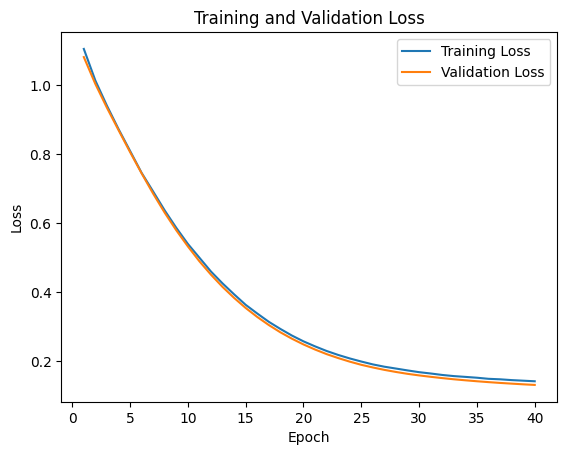

In [ ]:
# @title Let's train our model for 40 epochs
trained_params = batch_gradient_descent(jax_loss_fn, initial_params, training_data, val_data, learning_rate=1e-3, num_epochs=40, batch_size=8)

Let's plot the prediction vs true values to qualitatively evaluate the performance of our model.

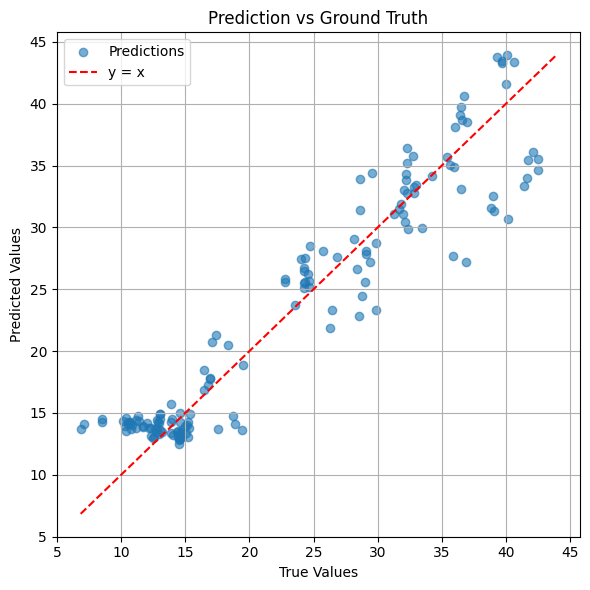

In [ ]:
# @title Helper function -- plot predictions
def plot_predictions(params, data, y_scaler):
  """Plot the predicted vs true values to qualitatively evaluate our model
  Args:
    params:
      trained model parameters
    data:
      tuple (X, y) of the data
    y_scaler:
      data preprocessing function to apply inverse transforms
  """

  X, y_scaled = data
  y_true = y_scaler.inverse_transform(y_scaled)

  y_pred_scaled = model.apply(params, X)
  y_pred = y_scaler.inverse_transform(y_pred_scaled)

  plt.figure(figsize=(6, 6))
  plt.scatter(y_true, y_pred, alpha=0.6, label='Predictions')
  min_val = min(np.min(y_true), np.min(y_pred))
  max_val = max(np.max(y_true), np.max(y_pred))

  # Plot the reference line y = x
  plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

  plt.xlabel('True Values')
  plt.ylabel('Predicted Values')
  plt.title('Prediction vs Ground Truth')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

plot_predictions(trained_params, val_data, y_scaler)

The plot provides a visual indication of how well our model is performing. Ideally, all points should lie on the red reference line $y=x$, which represents perfect predictions. We observe that while some points do lie close to this line, others deviate significantly. This suggests that there is still room for improvement in our model's ability to make accurate predictions.

In the next section, we will explore quantitative metrics to evaluate the model's performance more precisely.

**Evaluation Metrics**
In machine learning we optimise a loss function but this is generally not a direct measure of the performance of our model. Hence to measure the actual performance of our trained model, we usually measure other metrics after training.

For our regression task, let measure the $\text{R-squared}$ of your model. This is defined mathematically as follows
$$R^2 = 1 - \frac{\sum\left(y - \hat{y}\right)^2}{\sum\left(y - \bar{y}\right)^2},$$

where $y$, $\hat{y}$, and $\bar{y}$ are the true, predicted and mean values respectively.

- $R^2 = 1$: indicates perfect prediction. We want our $R^2$ to be as close as possible to 1.
- $R^2 = 0$: not better than just predicting the mean.
- $R^2 < 0$: poor model, worse performance than just predicting the mean.



**Code task**: complete the function below to compute the r^2 square of our model.

In [ ]:
# @title You code here -- r^2
def rsquare(params: Dict[str, jnp.array], data: tuple):
  X, y = data
  # complete this code

  # update me
  pred = model.apply(params, X)

  r2 = 1 - jnp.sum((y - pred)**2) / jnp.sum((y - jnp.mean(y))**2)

  return r2

In [ ]:
# @title Sample solution -- r^2. (Try not to peek until you've given it a good try!')
def rsquare(params: Dict[str, jnp.array], data: tuple):
  X, y = data

  pred = model.apply(params, X)

  top = jnp.sum((y - pred)**2)
  bottom = jnp.sum((y -jnp.mean(y))**2)

  r2 = 1 - top/(bottom + 1e-12) # to avoid division by zero
  return r2

Let compute the r-square of our model on our validation dataset

In [ ]:
r2 = rsquare(trained_params, val_data)
print(f"R-squared value is {r2:.2f}")

R-squared value is 0.90


Congratulations, we've just trained a machine learning model implemented with JAX for predicting the amount of energy needed to heat or cool down a building based on the structural design of the building.

**Take home challenge**:
- Are you satisfied with the R-square of your model?
- Do you have suggestions on how to improve the model?

# **Conclusion**
**Summary:**
- Machine learning is the science of using data to build intelligent systems.
- Deep learning is the subset of machine learning methods that uses neural networks.
- Optimisation is the process of finding the parameters that make the loss of a function as small as possible.
- JAX is a new popular framework that can be used to compute derivatives and train machine learning models.  
- JAX combines Autograd and XLA to perform **accelerated** 🚀 numerical computations.
- JAX's `grad` function automatically calculates the gradients of your functions for you!
- Gradient descent is an effective algorithm to train deep learning models.


**Next Steps:**

- Join the reinforcement learning practicals to taste a different flavour of machine learning.

- Attend the next practical session on machine learning foundations which will take place after the conference.


**References:**

1. "Introduction and Motivation" from [Mathematics for Machine Learning by
Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong (2020).](https://mml-book.github.io/).
2. "Introduction" from [Dive into Deep Learning](https://d2l.ai/).
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning
4. Various JAX [docs](https://jax.readthedocs.io/en/latest/) - specifically [quickstart](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html), [common gotchas](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html), [jitting](
https://jax.readthedocs.io/en/latest/jax-101/02-jitting.html#), [random numbers](https://jax.readthedocs.io/en/latest/jax-101/05-random-numbers.html) and [pmap](https://jax.readthedocs.io/en/latest/jax-101/06-parallelism.html?highlight=pmap#).
5. Previous Indaba Practicals - [Introduction to ML using JAX](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb) and [Dive into Machine Learning: Learning by Implementing](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/Intro_ML_English_Prac.ipynb).

For other practicals from the Deep Learning Indaba, please visit [here](https://github.com/deep-learning-indaba/indaba-pracs-2025).

## Feedback

Please fill out this form as it is a very important part of the practicals. Your feedback will help us **improve the practicals and will also count towards the prize at the end of the sessions!**

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/AJr8t3mzXV2WRgHy6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

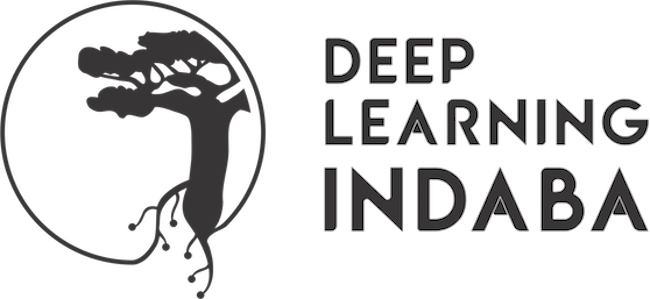